# Support vector regression (SVR)

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

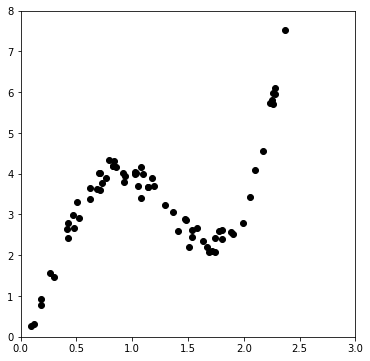

In [20]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 100))

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

# Wyznacz optymalne parametry

In [21]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [0.001, 0.01, 0.1, 1, 10 ,100, 1000],
                               "gamma": [0.001, 0.01, 0.1, 1, 10 ,100, 1000]})

In [22]:
svr.fit(x, y)
svr.best_params_

{'C': 1000, 'gamma': 1}

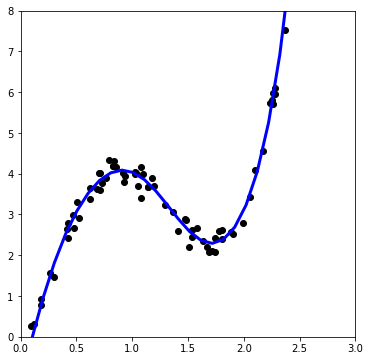

In [23]:
# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr.predict(x_plot), color='blue',linewidth=3)
plt.show()

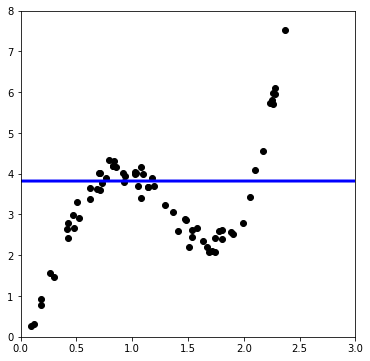

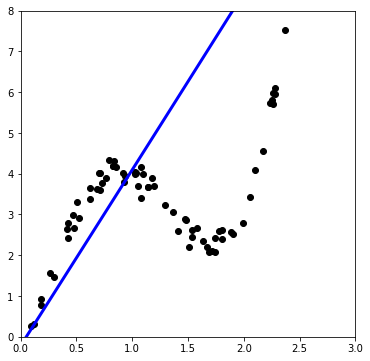

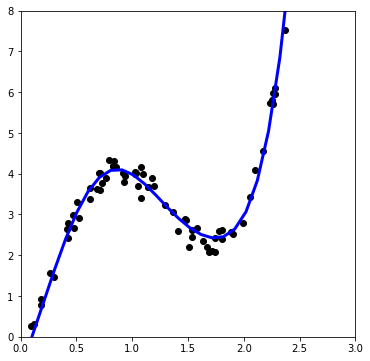

In [24]:
svr = SVR(kernel='rbf', gamma=1000, C=0.0001)
svr.fit(x,y)

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr.predict(x_plot), color='blue',linewidth=3)
plt.show()


svr = SVR(kernel='rbf', gamma=0.0001, C=10000)
svr.fit(x,y)

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr.predict(x_plot), color='blue',linewidth=3)
plt.show()

svr = SVR(kernel='rbf', gamma=1, C=50)
svr.fit(x,y)

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, svr.predict(x_plot), color='blue',linewidth=3)
plt.show()



# Zad

Wyznacz optymalne parametry dla modelu SVR.

In [25]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [0.001, 0.01, 0.1, 1, 10 ,100, 1000],
                               "gamma": [0.001, 0.01, 0.1, 1, 10 ,100, 1000]})

svr.fit(X, y)
print(svr.best_params_)
metrics.r2_score(y, svr.predict(X))


{'C': 100, 'gamma': 0.001}


0.9993130737632432